In [3]:
%reload_ext nb_black

import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.multitest import multipletests
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot

%matplotlib inline
import os

print(os.getcwd())

print(os.listdir(os.getcwd()))

C:\Users\jlim7\OneDrive\Documents\GitHub\For-Fun-LoL-Data
['.git', '.gitignore', '.ipynb_checkpoints', 'LoL EDA.ipynb', 'README.md']


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [5]:
# the data set contains stats 10 min into diamond ranked games (~10k)
# data obtained from https://www.kaggle.com/bobbyscience/league-of-legends-diamond-ranked-games-10-min
lol = pd.read_csv("high_diamond_ranked_10min.csv")
lol.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
### Use dropcolumns to get rid of red statistics. (Focus on blue side)

In [4]:
lol["blueWins"].value_counts()

0    4949
1    4930
Name: blueWins, dtype: int64

<IPython.core.display.Javascript object>

In [5]:
lol_bw = lol[lol["blueWins"] == 1]
lol_bl = lol[lol["blueWins"] == 0]

<IPython.core.display.Javascript object>

In [6]:
lol_bw.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
5,4475365709,1,18,0,0,5,3,6,1,1,...,0,15201,7.0,18060,221,59,-698,-101,22.1,1520.1
6,4493010632,1,18,3,1,7,6,7,1,1,...,0,14463,6.4,15404,164,35,-2411,-1563,16.4,1446.3
9,4509433346,1,13,1,1,4,5,5,1,1,...,0,16605,6.8,18379,247,43,1548,1574,24.7,1660.5
12,4515594785,1,18,1,1,7,1,11,1,1,...,0,14591,6.8,17443,240,50,-3274,-1659,24.0,1459.1
14,4516505202,1,15,3,1,4,4,4,0,0,...,0,16192,7.0,18083,242,48,470,187,24.2,1619.2


<IPython.core.display.Javascript object>

In [7]:
lol_bl.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


<IPython.core.display.Javascript object>

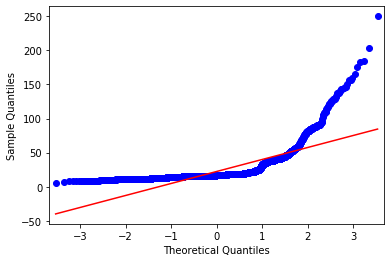

DescribeResult(nobs=4930, minmax=(5, 250), mean=22.289858012170384, variance=309.67271107742107, skewness=4.287780025136976, kurtosis=25.98049790284806)


<IPython.core.display.Javascript object>

In [10]:
qqplot(lol_bw["blueWardsPlaced"], line="s")
plt.show()
print(stats.describe(lol_bw["blueWardsPlaced"]))

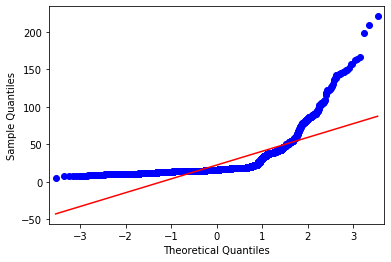

DescribeResult(nobs=4949, minmax=(5, 221), mean=22.28672459082643, variance=339.7166810439809, skewness=3.9977256995568777, kurtosis=21.21024307212911)


<IPython.core.display.Javascript object>

In [9]:
qqplot(lol_bl["blueWardsPlaced"], line="s")
plt.show()
print(stats.describe(lol_bl["blueWardsPlaced"]))

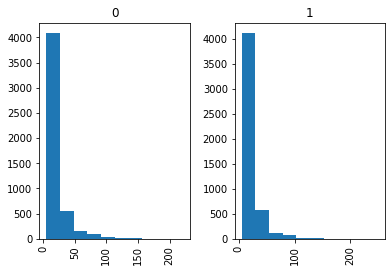

<IPython.core.display.Javascript object>

In [15]:
lol["blueWardsPlaced"].hist(by=lol["blueWins"])
plt.show()

In [19]:
stats.kruskal(lol_bl["blueWardsPlaced"], lol_bw["blueWardsPlaced"])

KruskalResult(statistic=19.185571393386578, pvalue=1.1860650321130626e-05)

<IPython.core.display.Javascript object>